<a href="https://colab.research.google.com/github/ImaneElAssari/Drugs-Related-to-Medical-Conditions/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from ipywidgets import interact

from sklearn.pipeline import make_pipeline

In [ ]:
#importation de la dataset
df=pd.read_csv('/content/drugs_for_common_treatments.csv')

In [ ]:
df.head()

,drug_name,medical_condition,medical_condition_description,activity,rx_otc,pregnancy_category,csa,alcohol,rating,no_of_reviews,medical_condition_url,drug_link
0,doxycycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,87%,Rx,D,N,X,6.8,760.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/doxycycline.html
1,spironolactone,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,82%,Rx,C,N,X,7.2,449.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/spironolactone.html
2,minocycline,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,48%,Rx,D,N,NaN,5.7,482.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/minocycline.html
3,Accutane,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,41%,Rx,X,N,X,7.9,623.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/accutane.html
4,clindamycin,Acne,Acne Other names: Acne Vulgaris; Blackheads; B...,39%,Rx,B,N,NaN,7.4,146.0,https://www.drugs.com/condition/acne.html,https://www.drugs.com/mtm/clindamycin-topical....


# Analyse de Forme:



*   Variable Target: rating
*   Lignes: 3959
*   Colonnes: 12
*   Types de variables: Numeriques - Categoriques
*   Missing Values: Oui
*   Duplications: Non



In [ ]:
# Determination de la taille de la dataset
df.shape

(3959, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   drug_name                      3959 non-null   object 
 1   medical_condition              3959 non-null   object 
 2   medical_condition_description  3959 non-null   object 
 3   activity                       3959 non-null   object 
 4   rx_otc                         3958 non-null   object 
 5   pregnancy_category             3710 non-null   object 
 6   csa                            3959 non-null   object 
 7   alcohol                        1991 non-null   object 
 8   rating                         2117 non-null   float64
 9   no_of_reviews                  2117 non-null   float64
 10  medical_condition_url          3959 non-null   object 
 11  drug_link                      3959 non-null   object 
dtypes: float64(2), object(10)
memory usage: 371.3+ K

In [ ]:
#Determination de duplications
len(df)-len(df.drop_duplicates())

0

In [ ]:
#Determination des valeurs manquantes
df.isna().sum()


drug_name                           0
medical_condition                   0
medical_condition_description       0
activity                            0
rx_otc                              1
pregnancy_category                249
csa                                 0
alcohol                          1968
rating                           1842
no_of_reviews                    1842
medical_condition_url               0
drug_link                           0
dtype: int64

<Axes: >

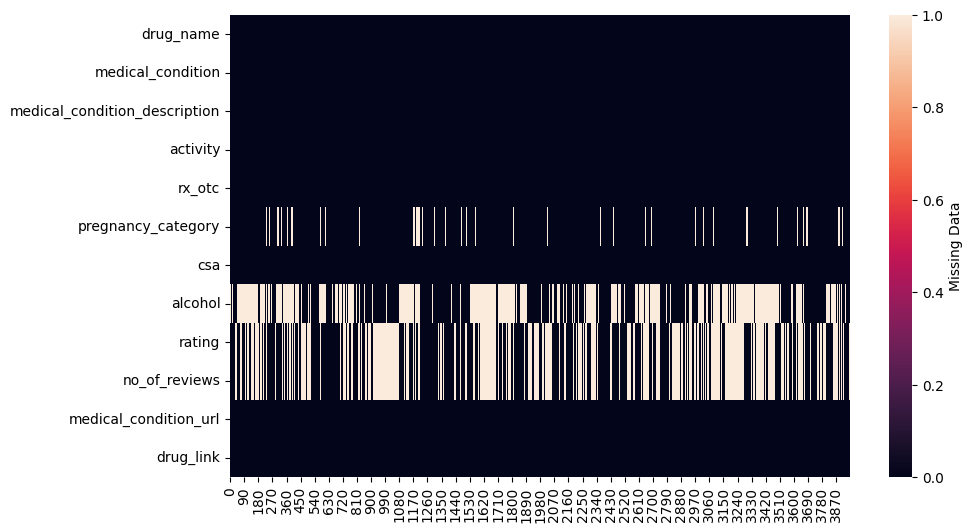

In [ ]:
#MVs heatmap 
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cbar_kws={'label': 'Missing Data'})

Description statistique des valeurs numeriques

In [ ]:
df.describe()

,rating,no_of_reviews
count,2117.000000,2117.000000
mean,6.791167,73.790269
std,2.291088,182.306687
min,0.000000,1.000000
25%,5.500000,2.000000
50%,7.000000,12.000000
75%,8.500000,57.000000
max,10.000000,2934.000000


# Analyse Unidimensionnelle :

Visualisation de la distribution des variables quantitatives 

In [ ]:
sns.lineplot(x = "rating",data=df)
sns.set(style='dark',)
plt.show()

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'no_of_reviews'}>]], dtype=object)

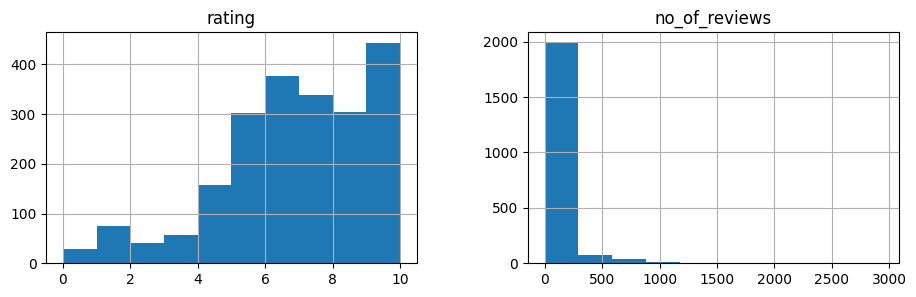

In [ ]:
df.hist(figsize=(11,3))


Visualisation des distributions des variables qualitatives

In [ ]:
categorical_variables=['medical_condition','rx_otc','pregnancy_category','csa']

In [ ]:
def bar_plot(a):
  df[a].value_counts(normalize=True).plot(kind='bar',figsize=(10,5))
  plt.ylabel('proportion')
  plt.title(str(a))
  return plt.show()



In [ ]:
interact(bar_plot, a=categorical_variables)

interactive(children=(Dropdown(description='a', options=('medical_condition', 'rx_otc', 'pregnancy_category', …

<function __main__.bar_plot(a)>

# Analyse Bidimensionnelle :

**Variation de la prescription (rx_otc) en fonction du rating**

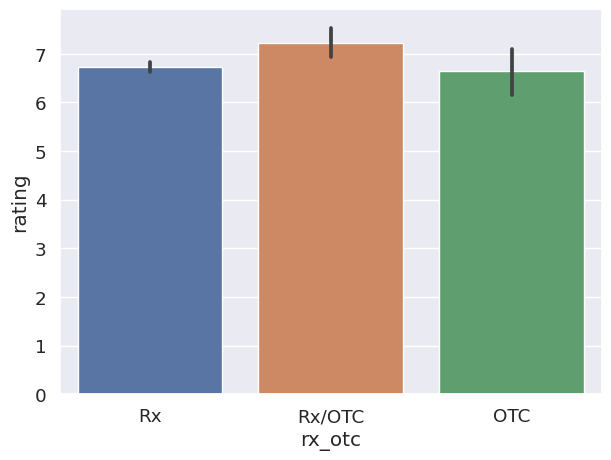

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
ax=sns.barplot(x='rx_otc',y='rating',data=df)

**Variation du rating selon pregnancy_category**

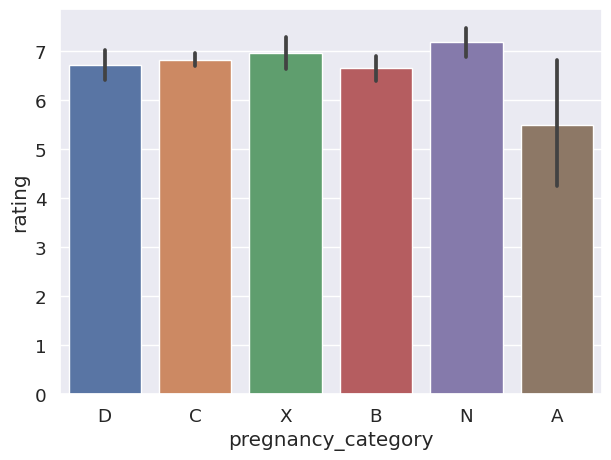

In [ ]:
sns.set(font_scale=1.2)
plt.figure(figsize=(7,5))
ax=sns.barplot(x='pregnancy_category',y='rating',data=df)

**Variation du rating selon rx_otc et pregnancy_category**

/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1560: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a,
/usr/local/lib/python3.10/dist-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


<Axes: xlabel='pregnancy_category', ylabel='rating'>

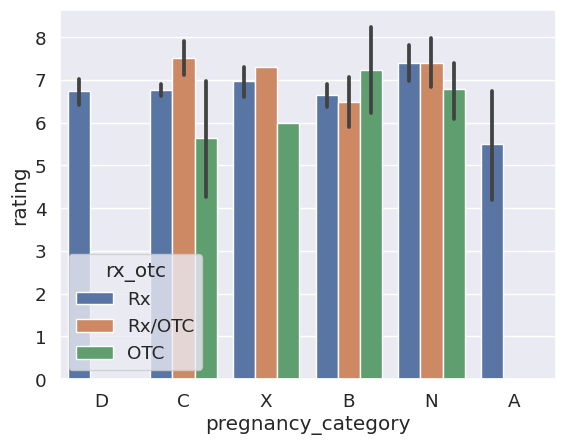

In [ ]:
sns.barplot(data=df, x="pregnancy_category", y="rating", hue="rx_otc")

**Relation entre rating et no_of_reviews**

On remarque une faible corrélation entre rating et no_of_reviews

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='no_of_reviews', ylabel='rating'>

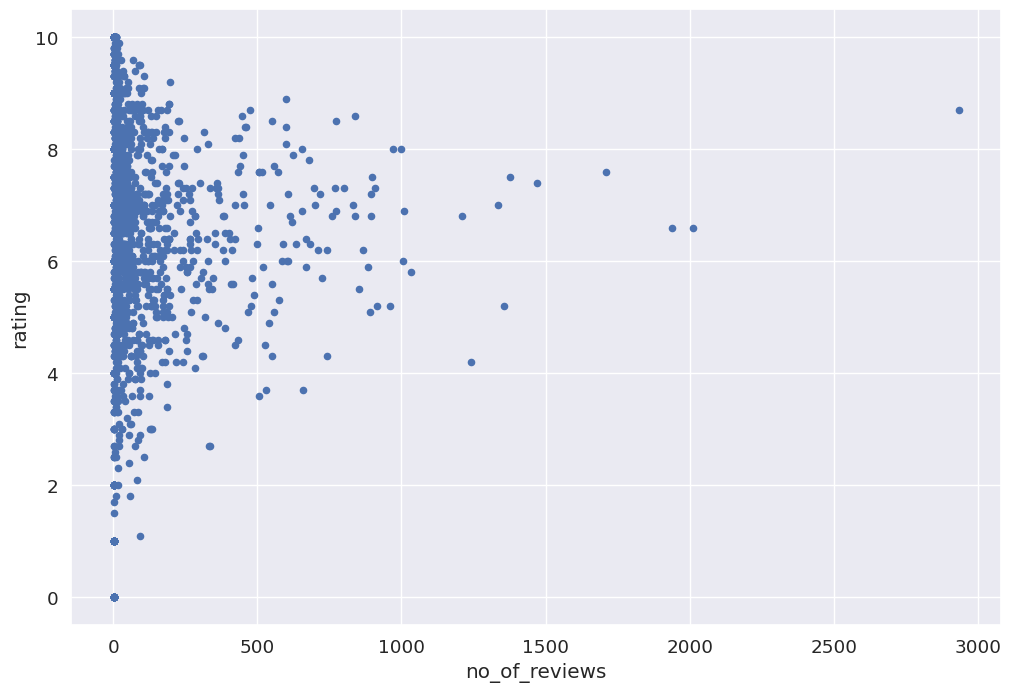

In [ ]:
df.plot(kind="scatter",x='no_of_reviews',y='rating',colormap='viridis',figsize=(12,8))

La remarque précédente est bien justifier à travers la matrice de corrélation suivante, coefficient de corrélation est inferieure a 0.5 est donc la variation du no_of_reviews n'impacte pas vraiment notre variable target (rating)

<ipython-input-18-cc03c53480dc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_Matrix=df.corr()


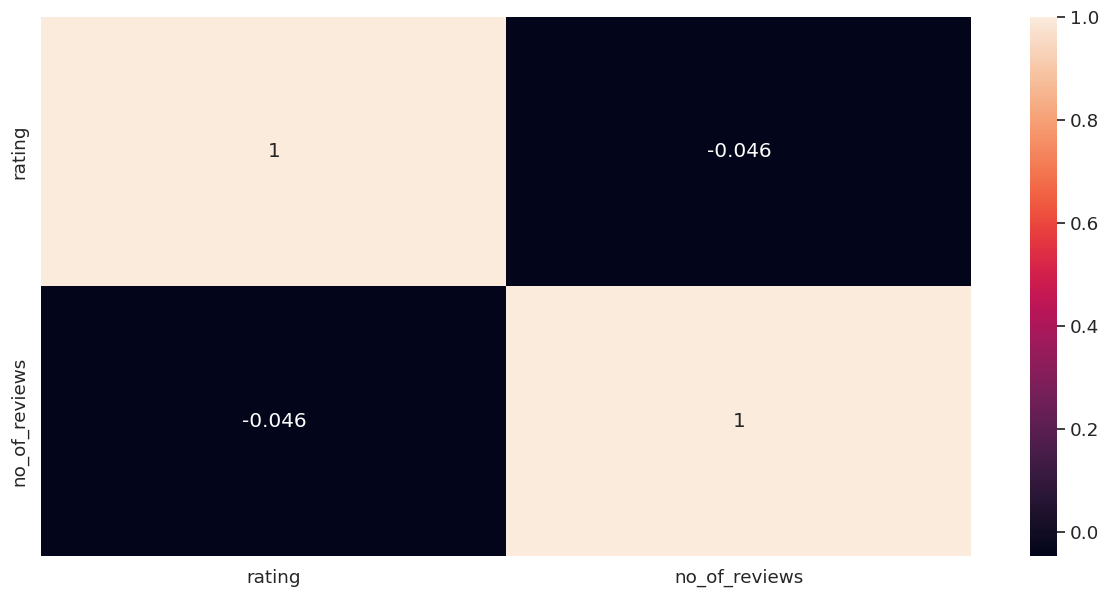

In [ ]:
# Matrice de correlation
plt.figure(figsize= (15,7))
correlation_Matrix=df.corr()
sns.heatmap(correlation_Matrix,annot=True)
plt.show()

**Determination du nombre de médicaments nécessitant une ordonnance et qui ont une interaction avec la variable alcool:**

In [ ]:
len(df.query('rx_otc == "Rx" and alcohol == "X"'))


1313

**Visualisation des 10 médicaments considérés comme étant les plus efficaces par leurs utilisateurs:**





In [ ]:
#Tri des médicament selon leur efficacité
sorted_drugs=df.sort_values(by='rating',ascending=False)
top_10_drugs=sorted_drugs[['drug_name', 'rating']].head(10)


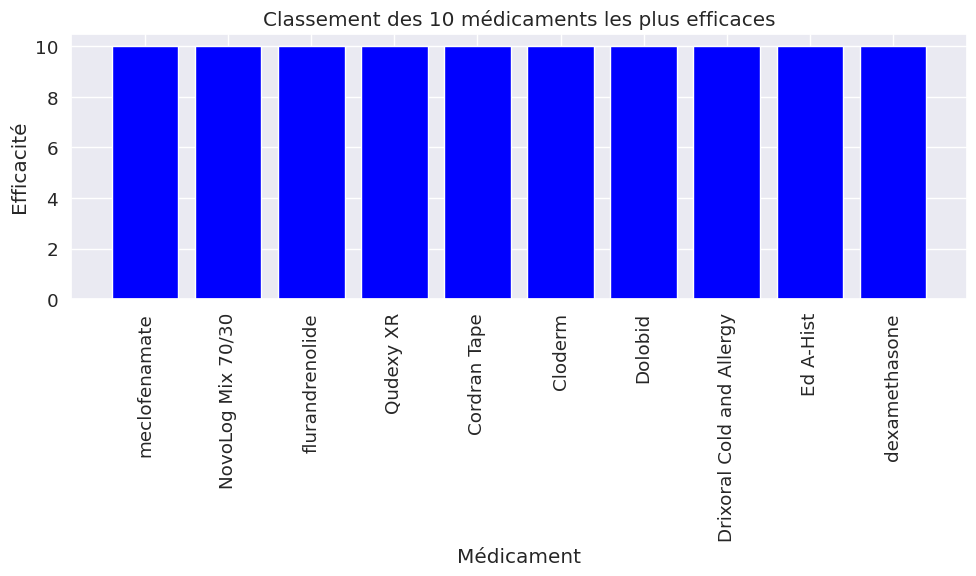

In [ ]:
# Données des 10 médicaments les plus efficaces
medicaments = top_10_drugs['drug_name']
efficacite = top_10_drugs['rating']

# Création du barplot
plt.figure(figsize=(10, 6)) 
plt.bar(medicaments, efficacite, color='blue')  
plt.xlabel('Médicament')  
plt.ylabel('Efficacité')  
plt.title('Classement des 10 médicaments les plus efficaces') 
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show() 